In [ ]:
from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairam40011","key":"468aec11255449170ddd31a4e8e95a29"}'}

In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 341M/346M [00:03<00:00, 123MB/s]
100% 346M/346M [00:03<00:00, 119MB/s]


In [ ]:
pwd

'/content'

In [ ]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
pred='/content/seg_pred/seg_pred'

In [ ]:
test='/content/seg_test/seg_test'

In [ ]:
train='/content/seg_train/seg_train'

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

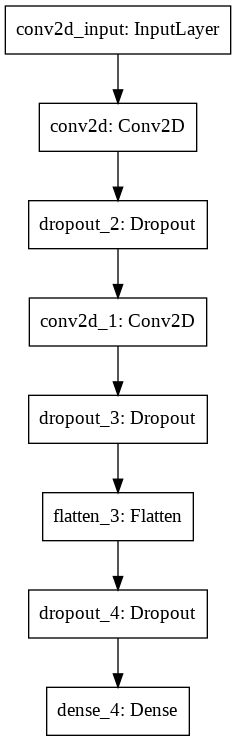

In [ ]:
import tensorflow.keras.utils
tensorflow.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False)

In [ ]:
pip install visualkeras

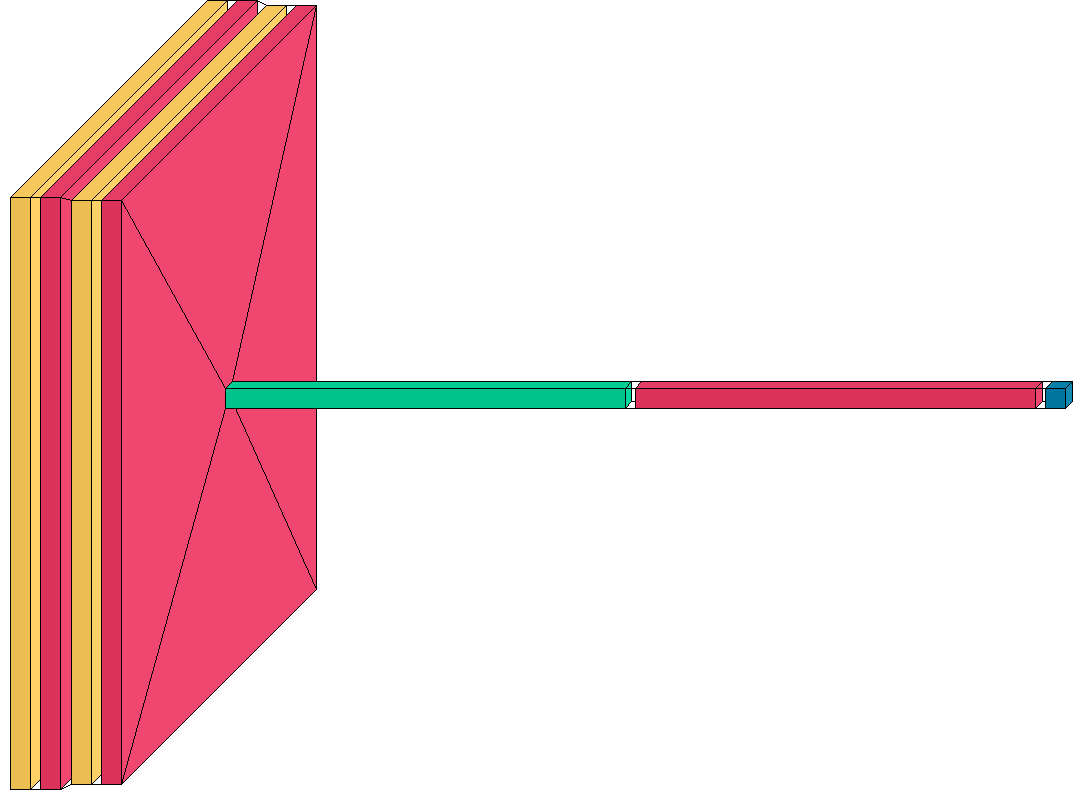

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 146, 146, 64)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1364224)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1364224)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 8

In [ ]:
TRAINING_DIR = '/content/seg_train/seg_train'
train_datagen = ImageDataGenerator(rescale=1/255.0)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150,150)
                                                        
)

VALIDATION_DIR = '/content/seg_test/seg_test'
validation_datagen = ImageDataGenerator(rescale=1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150,150)
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
class_names_dict=train_generator.class_indices
class_names_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
import pandas as pd
class_indeces = pd.Series({v: k for k, v in class_names_dict.items()})
class_indeces

0    buildings
1       forest
2      glacier
3     mountain
4          sea
5       street
dtype: object

In [ ]:
history = model.fit(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/3
141/141 [==============================] - 1431s 10s/step - loss: 7.4516 - accuracy: 0.3073 - val_loss: 1.0464 - val_accuracy: 0.5763
Epoch 2/3
141/141 [==============================] - 1463s 10s/step - loss: 0.8206 - accuracy: 0.6939 - val_loss: 0.8740 - val_accuracy: 0.6683
Epoch 3/3
141/141 [==============================] - 1456s 10s/step - loss: 0.4428 - accuracy: 0.8531 - val_loss: 0.8852 - val_accuracy: 0.6903


# Augmentation

In [ ]:
TRAINING_DIR = '/content/seg_train/seg_train'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150,150)
)

VALIDATION_DIR = '/content/seg_test/seg_test'
validation_datagen = ImageDataGenerator(rescale=1/255.0)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150,150)
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
 import tensorflow as tf
 # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(6,activation='sigmoid')
    
])

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/3
141/141 [==============================] - 502s 4s/step - loss: 3.3672 - acc: 0.3851 - val_loss: 0.9283 - val_acc: 0.6440
Epoch 2/3
141/141 [==============================] - 523s 4s/step - loss: 0.9905 - acc: 0.6262 - val_loss: 0.9085 - val_acc: 0.6737
Epoch 3/3
141/141 [==============================] - 507s 4s/step - loss: 0.8897 - acc: 0.6646 - val_loss: 0.8305 - val_acc: 0.7073


# Transfer Learning INCEPTION V3

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable=False
    
pre_trained_model.summary()



--2021-02-23 07:16:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  74.4MB/s    in 1.1s    

2021-02-23 07:16:23 (74.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0         

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 94.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.94):
            print("\nReached 94.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024,activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(6,activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 
 
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)
model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 94% accuracy

callbacks = myCallback()
history = model.fit_generator(train_generator,validation_data=validation_generator,
                             epochs=3,verbose=1,
                             callbacks=[callbacks])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
141/141 [==============================] - 637s 4s/step - loss: 0.6432 - accuracy: 0.7638 - val_loss: 0.2783 - val_accuracy: 0.8983
Epoch 2/3
141/141 [==============================] - 632s 4s/step - loss: 0.3471 - accuracy: 0.8756 - val_loss: 0.2611 - val_accuracy: 0.9057
Epoch 3/3
141/141 [==============================] - 642s 5s/step - loss: 0.3388 - accuracy: 0.8736 - val_loss: 0.2526 - val_accuracy: 0.9057


Saving 24fbcc47-174a-455f-b2d6-ad300c685dc1.jpg to 24fbcc47-174a-455f-b2d6-ad300c685dc1.jpg
[1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.5537257e-36]
24fbcc47-174a-455f-b2d6-ad300c685dc1.jpg is a Buildings


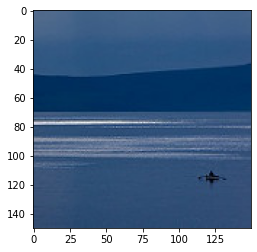

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150,150,3))
    plt.imshow(img)
    x = image.img_to_array(img)
    #x = tensorflow.image.rgb_to_grayscale(x)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0][0]>=1:
        print(fn + " is a Buildings")
    elif classes[0][1]>=1:
        print(fn + " is a forest")
    elif classes[0][2]>=1:
        print(fn + " is a glacier")  
    elif classes[0][3]>=1:
        print(fn + " is a mountain")
    elif classes[0][4]>=1:
        print(fn + " is a sea")
    else:
        print(fn + " is a street")  

# EFFICIENTNET`

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
pre_trained_model = EfficientNetB0(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable=False
    
pre_trained_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 150, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 150, 150, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [ ]:
#block4b_se_squeeze


In [ ]:
last_layer = pre_trained_model.get_layer('block6d_activation')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 1152)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 94.0%
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.94):
            print("\nReached 94.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
import tensorflow 
from tensorflow.keras import layers
from tensorflow.keras import Model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024,activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(6,activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 
 
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)
model.compile(optimizer = 'Adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 150, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 150, 150, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 94% accuracy

callbacks = myCallback()
history = model.fit_generator(train_generator,validation_data=validation_generator,
                             epochs=3,verbose=1,
                             callbacks=[callbacks])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
141/141 [==============================] - 564s 4s/step - loss: 1.7914 - accuracy: 0.1767 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 2/3
141/141 [==============================] - 566s 4s/step - loss: 1.7905 - accuracy: 0.1852 - val_loss: 1.7901 - val_accuracy: 0.1750
Epoch 3/3
141/141 [==============================] - 554s 4s/step - loss: 1.7912 - accuracy: 0.1792 - val_loss: 1.7900 - val_accuracy: 0.1750
